# Stock Prediction Using Machine Learning

In [17]:
# Importing Required Libraries
import yfinance as yf
import pandas as pd
import os

# Data Collection
if os.path.exists("nvda.csv"):
    nvda = pd.read_csv("nvda.csv", index_col=0)   
else:
    nvda = yf.Ticker("NVDA")
    nvda = nvda.history(period="max")
    nvda.to_csv("nvda.csv")
    
nvda.index = pd.to_datetime(nvda.index, utc=True)
nvda

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-11 00:00:00+00:00,474.910004,475.309998,458.299988,466.269989,466.248108,50972800
2023-12-12 00:00:00+00:00,460.459991,476.660004,460.459991,476.570007,476.547638,37238700
2023-12-13 00:00:00+00:00,476.290009,485.940002,476.079987,480.880005,480.857452,44779200
2023-12-14 00:00:00+00:00,483.899994,486.700012,474.220001,483.500000,483.477325,39123200
2023-12-15 00:00:00+00:00,481.940002,494.040009,481.200012,488.899994,488.877075,47947800
...,...,...,...,...,...,...
2024-04-15 00:00:00+00:00,890.979980,906.130005,859.289978,860.010010,860.010010,44307700
2024-04-16 00:00:00+00:00,864.330017,881.179993,860.640015,874.150024,874.150024,37045300
2024-04-17 00:00:00+00:00,883.400024,887.750000,839.500000,840.349976,840.349976,49540000


In [18]:
nvda.isnull().sum()#checking null values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
#checking the shape of dataset
nvda.shape

(90, 6)

In [20]:
nvda.describe() #describe function

,Open,High,Low,Close,Adj Close,Volume
count,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01
mean,711.772553,724.245888,697.803555,711.512110,711.493959,4.983075e+07
std,164.492987,168.457738,157.841144,161.844916,161.853955,1.509179e+07
min,460.459991,475.309998,458.299988,466.269989,466.248108,2.336480e+07
25%,550.037491,556.272522,544.324997,551.297485,551.271637,4.108648e+07
50%,722.734985,737.125000,707.309998,721.904999,721.871155,4.762785e+07
75%,874.364990,893.670013,859.282486,873.445023,873.445023,5.858540e+07
max,958.510010,974.000000,935.099976,950.020020,950.020020,1.132996e+08


In [21]:
#creating a column tomorrow using close data
nvda["Tomorrow"] = nvda["Close"].shift(-1)
nvda

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
2023-12-11 00:00:00+00:00,474.910004,475.309998,458.299988,466.269989,466.248108,50972800,476.570007
2023-12-12 00:00:00+00:00,460.459991,476.660004,460.459991,476.570007,476.547638,37238700,480.880005
2023-12-13 00:00:00+00:00,476.290009,485.940002,476.079987,480.880005,480.857452,44779200,483.500000
2023-12-14 00:00:00+00:00,483.899994,486.700012,474.220001,483.500000,483.477325,39123200,488.899994
2023-12-15 00:00:00+00:00,481.940002,494.040009,481.200012,488.899994,488.877075,47947800,500.769989
...,...,...,...,...,...,...,...
2024-04-15 00:00:00+00:00,890.979980,906.130005,859.289978,860.010010,860.010010,44307700,874.150024
2024-04-16 00:00:00+00:00,864.330017,881.179993,860.640015,874.150024,874.150024,37045300,840.349976
2024-04-17 00:00:00+00:00,883.400024,887.750000,839.500000,840.349976,840.349976,49540000,846.710022


In [22]:
# Drop rows with missing values
nvda.dropna(subset=["Tomorrow", "Close"], inplace=True)
nvda

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
2023-12-11 00:00:00+00:00,474.910004,475.309998,458.299988,466.269989,466.248108,50972800,476.570007
2023-12-12 00:00:00+00:00,460.459991,476.660004,460.459991,476.570007,476.547638,37238700,480.880005
2023-12-13 00:00:00+00:00,476.290009,485.940002,476.079987,480.880005,480.857452,44779200,483.500000
2023-12-14 00:00:00+00:00,483.899994,486.700012,474.220001,483.500000,483.477325,39123200,488.899994
2023-12-15 00:00:00+00:00,481.940002,494.040009,481.200012,488.899994,488.877075,47947800,500.769989
...,...,...,...,...,...,...,...
2024-04-12 00:00:00+00:00,896.989990,901.750000,875.299988,881.859985,881.859985,42488900,860.010010
2024-04-15 00:00:00+00:00,890.979980,906.130005,859.289978,860.010010,860.010010,44307700,874.150024
2024-04-16 00:00:00+00:00,864.330017,881.179993,860.640015,874.150024,874.150024,37045300,840.349976


In [23]:
# Convert "Tomorrow" and "Close" columns to datetime
nvda["Tomorrow"] = pd.to_datetime(nvda["Tomorrow"])
nvda["Close"] = pd.to_datetime(nvda["Close"])



In [24]:
nvda

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
2023-12-11 00:00:00+00:00,474.910004,475.309998,458.299988,1970-01-01 00:00:00.000000466,466.248108,50972800,1970-01-01 00:00:00.000000476
2023-12-12 00:00:00+00:00,460.459991,476.660004,460.459991,1970-01-01 00:00:00.000000476,476.547638,37238700,1970-01-01 00:00:00.000000480
2023-12-13 00:00:00+00:00,476.290009,485.940002,476.079987,1970-01-01 00:00:00.000000480,480.857452,44779200,1970-01-01 00:00:00.000000483
2023-12-14 00:00:00+00:00,483.899994,486.700012,474.220001,1970-01-01 00:00:00.000000483,483.477325,39123200,1970-01-01 00:00:00.000000488
2023-12-15 00:00:00+00:00,481.940002,494.040009,481.200012,1970-01-01 00:00:00.000000488,488.877075,47947800,1970-01-01 00:00:00.000000500
...,...,...,...,...,...,...,...
2024-04-12 00:00:00+00:00,896.989990,901.750000,875.299988,1970-01-01 00:00:00.000000881,881.859985,42488900,1970-01-01 00:00:00.000000860
2024-04-15 00:00:00+00:00,890.979980,906.130005,859.289978,1970-01-01 00:00:00.000000860,860.010010,44307700,1970-01-01 00:00:00.000000874
2024-04-16 00:00:00+00:00,864.330017,881.179993,860.640015,1970-01-01 00:00:00.000000874,874.150024,37045300,1970-01-01 00:00:00.000000840


Creating a Target column

Creating target column by considering tomorrow price greater than closing price with data type integer

In [25]:
import numpy as np
nvda["Target"] = (nvda["Tomorrow"] > nvda["Close"]).astype(int)



In [26]:
nvda

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2023-12-11 00:00:00+00:00,474.910004,475.309998,458.299988,1970-01-01 00:00:00.000000466,466.248108,50972800,1970-01-01 00:00:00.000000476,1
2023-12-12 00:00:00+00:00,460.459991,476.660004,460.459991,1970-01-01 00:00:00.000000476,476.547638,37238700,1970-01-01 00:00:00.000000480,1
2023-12-13 00:00:00+00:00,476.290009,485.940002,476.079987,1970-01-01 00:00:00.000000480,480.857452,44779200,1970-01-01 00:00:00.000000483,1
2023-12-14 00:00:00+00:00,483.899994,486.700012,474.220001,1970-01-01 00:00:00.000000483,483.477325,39123200,1970-01-01 00:00:00.000000488,1
2023-12-15 00:00:00+00:00,481.940002,494.040009,481.200012,1970-01-01 00:00:00.000000488,488.877075,47947800,1970-01-01 00:00:00.000000500,1
...,...,...,...,...,...,...,...,...
2024-04-12 00:00:00+00:00,896.989990,901.750000,875.299988,1970-01-01 00:00:00.000000881,881.859985,42488900,1970-01-01 00:00:00.000000860,0
2024-04-15 00:00:00+00:00,890.979980,906.130005,859.289978,1970-01-01 00:00:00.000000860,860.010010,44307700,1970-01-01 00:00:00.000000874,1
2024-04-16 00:00:00+00:00,864.330017,881.179993,860.640015,1970-01-01 00:00:00.000000874,874.150024,37045300,1970-01-01 00:00:00.000000840,0


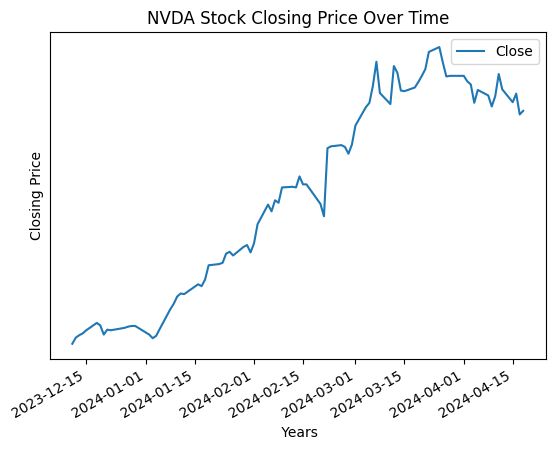

In [27]:
# nvda.plot.line(y="Close", use_index=True) #chart on aaple stock with closing price on y axis and years on x axis
import matplotlib.pyplot as plt

nvda.plot.line(y="Close", use_index=True)
plt.xlabel(" Years")  # X-axis label
plt.ylabel("Closing Price")  # Y-axis label
plt.title("NVDA Stock Closing Price Over Time")  # Title of the plot
plt.show()




In [ ]:
# Feature Selection
X = nvda[["Open", "High", "Low", "Volume"]]  # Adjust features as needed
y = nvda["Target"]

In [35]:
# Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Build the Model



In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
# Making Predictions
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)


In [49]:
#calculating the accuracy
from sklearn.metrics import accuracy_score
rf_pred = model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.5555555555555556


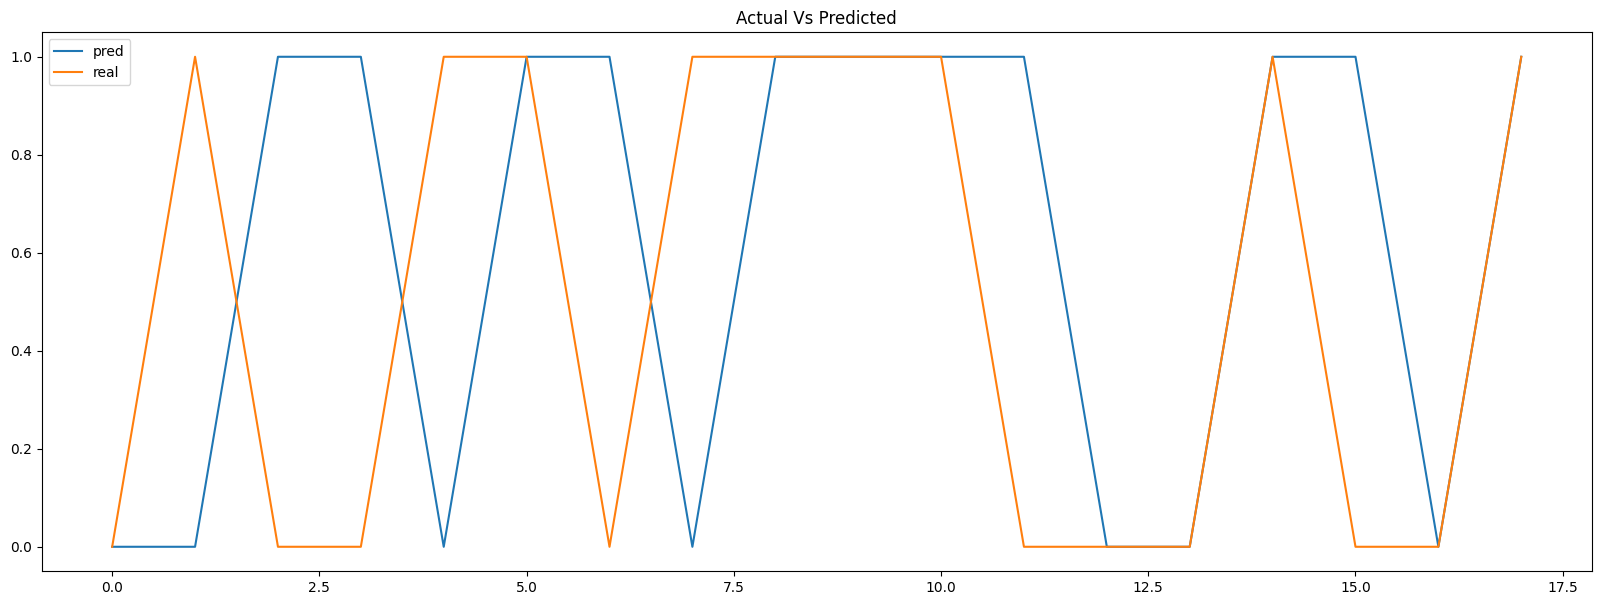

In [53]:
#plotting actual vs predicted
plt.figure(figsize=(20,7))
plt.plot(np.arange(len(y_pred)), y_pred, label='Pred')
plt.plot(np.arange(len(y_test)), y_test, label='Real' );
plt.title('Actual Vs Predicted')
plt.legend();

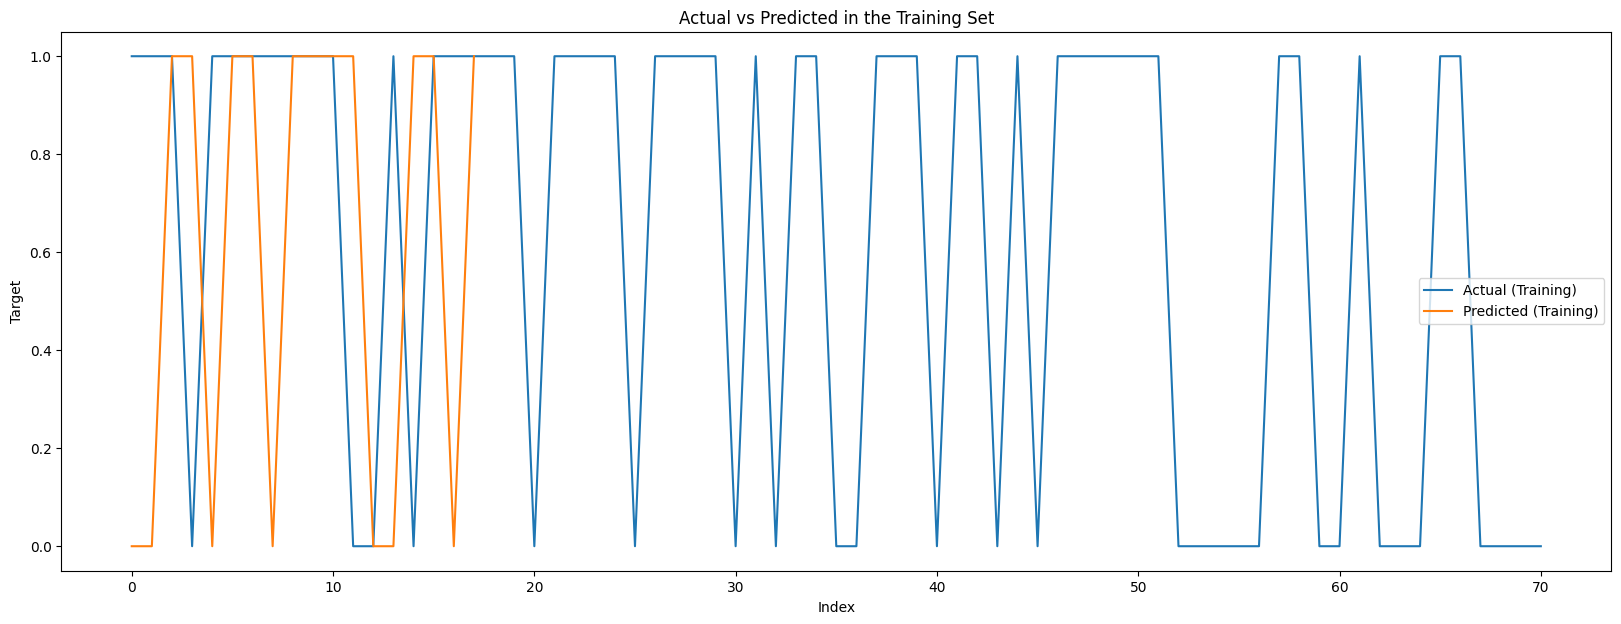

In [66]:
#Plotting actual vs predicted for training data
plt.figure(figsize=(20, 7))
plt.plot(np.arange(len(y_train)), y_train, label='Actual (Training)')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Training)')
plt.title('Actual vs Predicted in the Training Set')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()






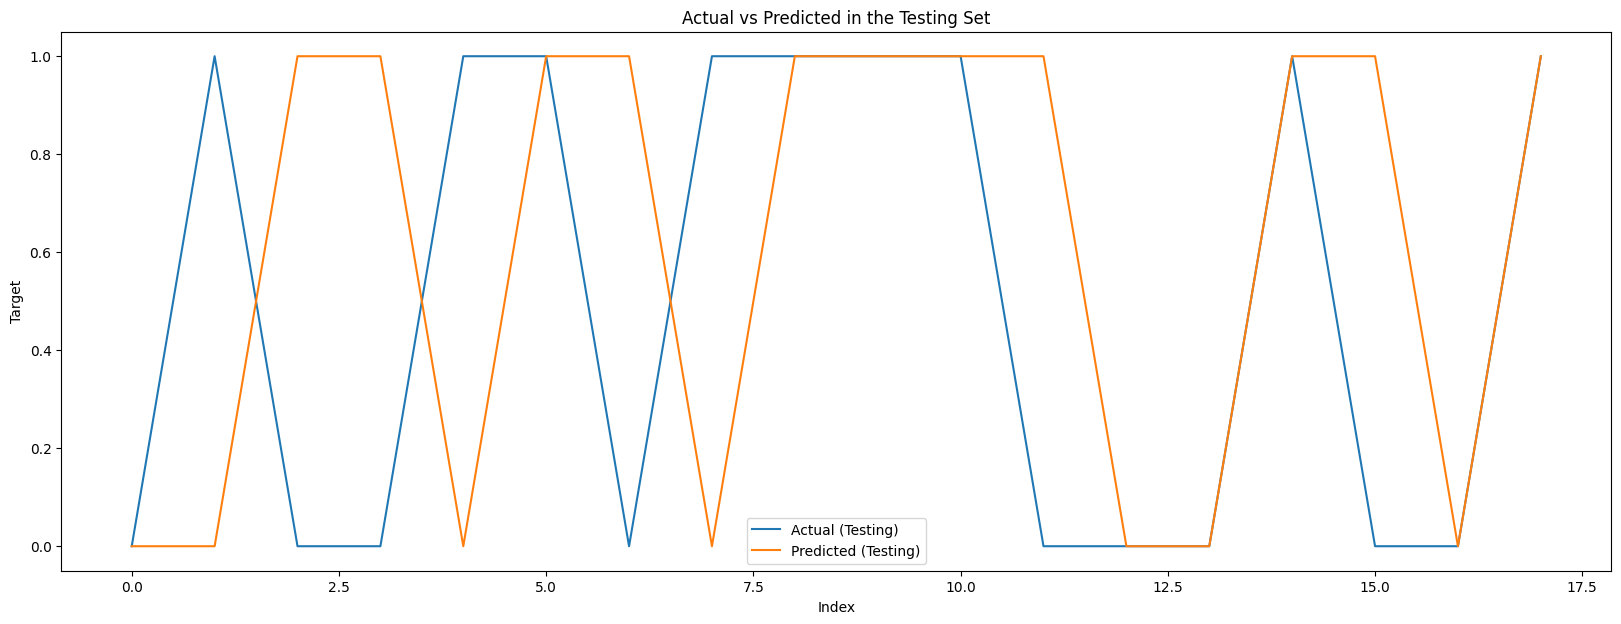

In [67]:
# # # Plotting actual vs predicted for testing data
plt.figure(figsize=(20, 7))
plt.plot(np.arange(len(y_test)), y_test, label='Actual (Testing)')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Testing)')
plt.title('Actual vs Predicted in the Testing Set')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()




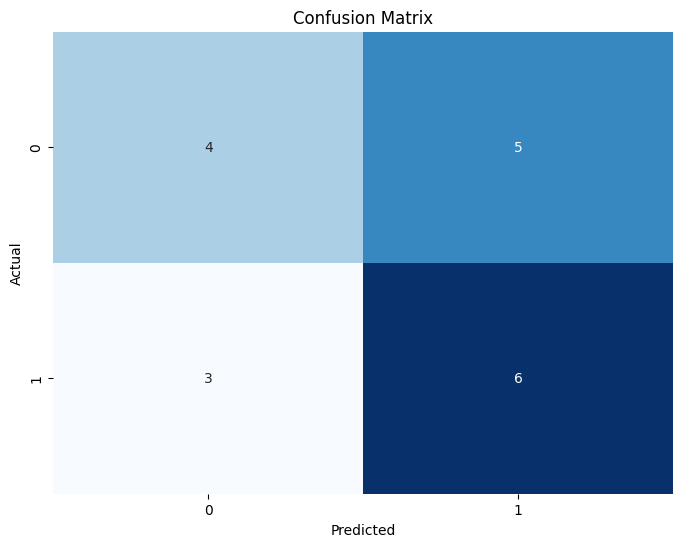

In [70]:
# Plotting Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



True Positive (TP): The model correctly predicted the positive class 4 times.
False Negative (FN): The model incorrectly predicted the negative class when the actual class was positive 5 times.
False Positive (FP): The model incorrectly predicted the positive class when the actual class was negative 3 times.
True Negative (TN): The model correctly predicted the negative class 6 times.

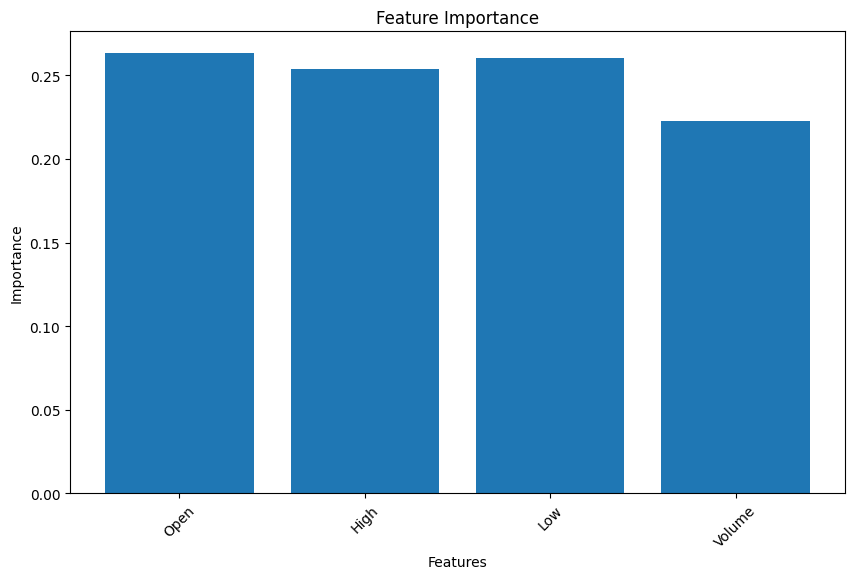

In [85]:
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


If the open and high features have high importance, it indicates that they are essential factors in determining the outcome of the model's predictions.

Let's try a different ensemble method called AdaBoost Classifier. AdaBoost is a boosting technique that combines multiple weak learners to create a strong classifier. 

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best Model Accuracy: 0.6666666666666666


Great!!! here we can see the improvement in the model accuracy.